In [1]:
# 引入所需要的全部包
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import time
import sklearn
from sklearn.model_selection import train_test_split #用于训练集和测试集的划分
from sklearn.linear_model import LinearRegression #线性回归模型
from sklearn.preprocessing import StandardScaler #用于数据的标准化，去量纲，消除数据本身范围的影响
from sklearn.preprocessing import PolynomialFeatures #多项式
from sklearn.pipeline import Pipeline #管道用于集结模型，为了操作的统一和方便

In [2]:
## 创建一个时间字符串格式化字符串
def date_format(dt):
    import time
    t = time.strptime(' '.join(dt), '%d/%m/%Y %H:%M:%S')
    return (t.tm_year, t.tm_mon, t.tm_mday, t.tm_hour, t.tm_min, t.tm_sec)

In [3]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [4]:
# 加载数据
path = 'datas\household_power_consumption_1000.txt' ## 提取的1000行数据
df = pd.read_csv(path, sep=';', low_memory=False)

# 日期、时间、有功功率、无功功率、电压、电流、厨房用电功率、洗衣服用电功率、热水器用电功率
names=df.columns
#names=['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# 异常数据处理(异常数据过滤)
new_df = df.replace('?', np.nan)
datas = new_df.dropna(axis=0,how = 'any') # 只要有数据为空，就进行删除操作

准确率: 0.4850657817514212


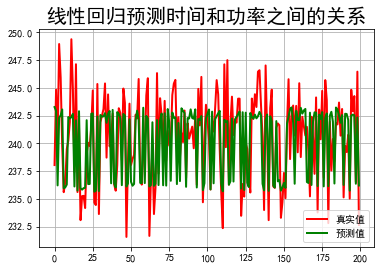

In [5]:
## 时间和电压之间的关系(Linear)
# 获取x和y变量, 并将时间转换为数值型连续变量
X = datas[names[0:2]]
X = X.apply(lambda x: pd.Series(date_format(x)), axis=1)
Y = datas[names[4]].values

# 对数据集进行测试集合训练集划分 
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 数据标准化
ss = StandardScaler()
X_train = ss.fit_transform(X_train) # 训练并转换
X_test = ss.transform(X_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 

# 模型训练
lr = LinearRegression()
lr.fit(X_train, Y_train) ## 训练模型

# 模型校验
y_predict = lr.predict(X_test) ## 预测结果

# 模型效果
print("准确率:",lr.score(X_test, Y_test))

## 预测值和实际值画图比较
t=np.arange(len(X_test))
plt.figure(facecolor='w')
plt.plot(t, Y_test, 'r-', linewidth=2, label=u'真实值')
plt.plot(t, y_predict, 'g-', linewidth=2, label=u'预测值')
plt.legend(loc = 'lower right')
plt.title(u"线性回归预测时间和功率之间的关系", fontsize=20)
plt.grid(b=True)#网格
plt.show()

In [8]:
%matplotlib tk
## 时间和电压之间的关系(Linear-多项式)
models = [
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', LinearRegression(fit_intercept=False))
        ])
]
model = models[0]
# 获取x和y变量, 并将时间转换为数值型连续变量
X = datas[names[0:2]]
X = X.apply(lambda x: pd.Series(date_format(x)), axis=1)
Y = datas[names[4]]

# 对数据集进行测试集合训练集划分
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 数据标准化
ss = StandardScaler()
X_train = ss.fit_transform(X_train) # 训练并转换
X_test = ss.transform(X_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 

# 模型训练
t=np.arange(len(X_test))
N = 7
d_pool = np.arange(1,N,1) # 阶
m = d_pool.size
clrs = [] # 颜色
for c in np.linspace(16711680, 255, m):
    clrs.append('#%06x' % int(c))
plt.figure(figsize=(12,6), facecolor='w')#创建一个绘图窗口，设置大小，设置颜色

for i,d in enumerate(d_pool):
    plt.subplot(N-1,1,i+1)#控制画图位置 n-1代表有行数，1代表列数，i+1代表位置
    plt.plot(t, Y_test, 'r-', label=u'真实值', zorder=N)#绘制t 和 y测试集 用红色线连接  zorder表示画图顺序 1是第一位 2是第二位
    model.set_params(Poly__degree=d) # 设置多项式的阶乘
    lin = model.get_params('Linear')['Linear']
    #模型训练并打印系数
    model.fit(X_train, Y_train)
    output = u'%d阶，系数为：' % d
    print (output, lin.coef_.ravel())
    #模型预测 并输出得分
    y_hat = model.predict(X_test)
    s = model.score(X_test, Y_test)
    
    label = u'%d阶, 准确率=%.3f' % (d,s)
    plt.plot(t, y_hat, color=clrs[i], lw=3, alpha=0.75, label=label)
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.ylabel(u'%d阶结果' % d, fontsize=12)

## 预测值和实际值画图比较
plt.suptitle(u"线性回归预测时间和功率之间的多项式关系", fontsize=20)
plt.grid(b=True)
plt.show()

1阶，系数为： [2.39926650e+02 0.00000000e+00 0.00000000e+00 3.97781449e+00
 8.73334650e-01 1.70647992e-01 0.00000000e+00]
2阶，系数为： [ 1.23998300e+02  3.55271368e-14 -7.81597009e-14  5.34497071e+01
  2.95068077e+00  2.69407641e-01 -5.32907052e-15 -3.55271368e-15
  8.88178420e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.02461452e+02 -2.50100464e+01
 -5.18469319e-01  0.00000000e+00 -1.02427364e+01 -4.65982219e-01
  0.00000000e+00 -3.55472266e-02  0.00000000e+00  0.00000000e+00]
3阶，系数为： [ 1.06303324e+12 -7.52773669e+11  2.12816760e+12 -9.53433863e+12
  1.50224363e+11  1.24753680e+11 -2.10445177e+11 -2.86373371e+11
 -2.73949767e+11  1.63670539e+11  5.97002023e+10 -2.79408605e+11
 -3.55726203e+11 -2.59005902e+11  6.79712021e+10 -1.44760428e+10
  5.20112328e+10 -9.76562500e-04  2.60610968e+12 -6.05309076e+10
 -5.02678348e+10  0.00000000e+00  1.10827637e+00  3.45336914e-01
  0.00000000e+00  5.85

6阶，系数为： [ 3.28257647e+12 -2.88364574e+12  1.43224979e+12 -4.84738348e+12
  5.36286349e+12  5.95623834e+12 -2.24902657e+12  2.16516807e+11
 -7.79059698e+12  7.98285294e+11 -3.25753590e+12  8.79696517e+11
 -1.20007487e+12  1.36032646e+12  1.65287934e+12 -3.10559829e+12
  2.01824897e+11  7.87366633e+11 -4.96519933e+11 -1.22273765e+12
 -1.78570311e+12 -7.44693948e+11 -3.10031383e+11 -2.31449352e+11
 -1.01281963e+11 -1.10424307e+11  1.11348504e+11  1.43713614e+11
 -7.75271807e+10  1.79802222e+10 -7.96035028e+10  1.82316121e+10
 -2.65467172e+10  7.34173712e+10 -3.10461735e+10 -1.42377228e+10
 -3.27821775e+10  1.06439324e+10 -8.48742132e+09  5.46078359e+09
  2.57641548e+09  1.84258218e+09 -7.04686163e+08 -2.92116335e+08
  1.74290727e+09  2.08134036e+09  3.13122057e+09  1.67770627e+09
  1.08073184e+07  7.05527756e+05 -1.28260281e+05 -4.20180527e+04
 -3.55748140e+04  6.94438965e+03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 

自己练习

In [7]:
import numpy as np
d_pool = np.arange(1,10,1)
print(d_pool.size)
for i,d in enumerate(d_pool):
    print(i,d)

9
0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9


In [1]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=True,interaction_only=False)
X_new = poly.fit_transform(datas)

In [2]:
import pandas as pd
import numpy as np

In [41]:
datas = np.array([
    ['aa',1,2,3],
    ['bb',1,2,3],
    ['cc',1,2,3],
    ['dd',1,2,3]
])
df2 = pd.DataFrame(datas,columns=list('ABCD'))
print(df)

   A  B  C  D
0  0  1  2  3
1  1  1  2  3
2  2  1  2  3
3  3  1  2  3


In [42]:
df2['A'] = pd.Categorical(df2.A).codes
df2['E'] = pd.Series(['A','B','C','A'],dtype='object')
print(df2.info())
print(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
A    4 non-null int8
B    4 non-null object
C    4 non-null object
D    4 non-null object
E    4 non-null object
dtypes: int8(1), object(4)
memory usage: 212.0+ bytes
None
   A  B  C  D  E
0  0  1  2  3  A
1  1  1  2  3  B
2  2  1  2  3  C
3  3  1  2  3  A


In [50]:
print(df2.select_dtypes(['object']).columns)
print(df2[df2.select_dtypes(['object']).columns].shape)
df2[df2.select_dtypes(['object']).columns] = df2[df2.select_dtypes(['object']).columns].astype('float')

Index(['B', 'C', 'D', 'E'], dtype='object')
(4, 4)


ValueError: could not convert string to float: 'A'

In [36]:
df2.drop(['A'],axis=1,inplace=True)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
B    4 non-null object
C    4 non-null object
D    4 non-null object
E    4 non-null object
dtypes: object(4)
memory usage: 208.0+ bytes
None


In [8]:
df2.fillna(0.0,inplace=True)
df2.fillna(df2.mean(),inplace=True)#均值
df2.fillna(df2.median(),inplace=True)#中位数
df2.fillna(df2.mode().loc[0],inplace=True)#众数，由于dataframe的小bug，众数从第一行获取能保证准确性

In [38]:
print(df2.info())
df2.E = df2.E.astype('object')
E_new = pd.get_dummies(df2.E)
pd.concat([df2.drop(['E'],axis=1),E_new],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
B    4 non-null object
C    4 non-null object
D    4 non-null object
E    4 non-null object
dtypes: object(4)
memory usage: 208.0+ bytes
None


,B,C,D,A,B,C
0,1,2,3,1,0,0
1,1,2,3,0,1,0
2,1,2,3,0,0,1
3,1,2,3,1,0,0


In [40]:
print(type(E_new))

<class 'pandas.core.frame.DataFrame'>
